# Brain Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data

In [3]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\healthcare-dataset-stroke-data.csv")

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.shape

(5110, 12)

In [6]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data1=data.drop('id',axis=1)
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
data1.shape

(5110, 11)

In [10]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
data1.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
data1.duplicated().sum()

0

#                         EXPLORATORY DATA ANALYSIS

#COUNTPLOT

In [13]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Countplot for Stroke')

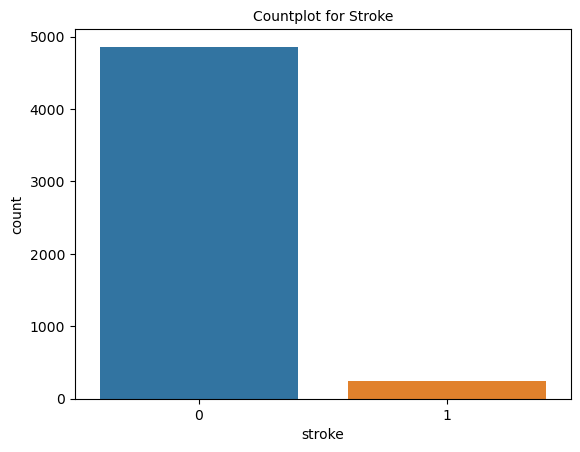

In [14]:
sns.countplot(x='stroke',data=data)
plt.title("Countplot for Stroke",{'fontsize':10})

In [15]:
#Seems like the dataset is imbalanced. Anyway, as we can there is not much difference between stroke rate concerning gender

In [16]:
data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [17]:
# count plot

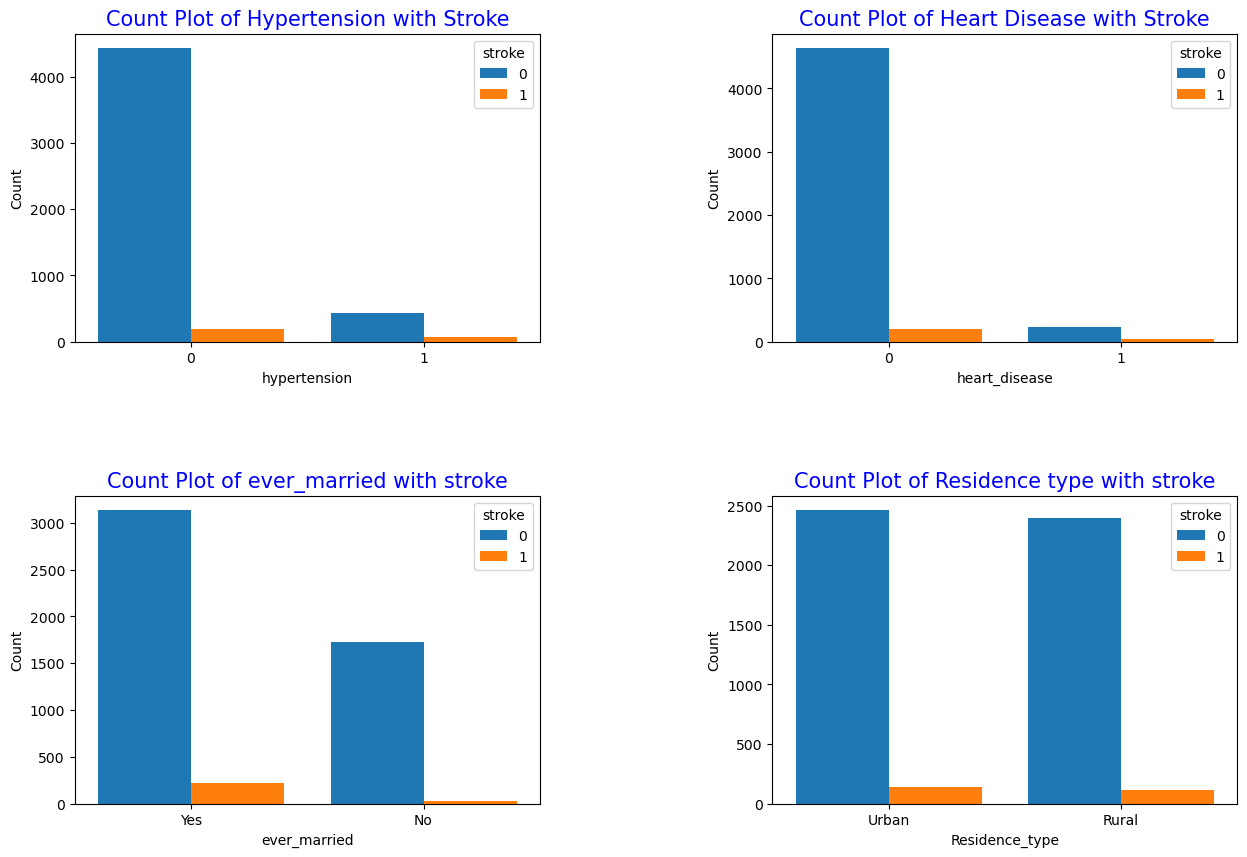

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.subplots_adjust(wspace=0.5)
sns.countplot(x='hypertension',data=data1,hue='stroke',saturation=2)
plt.title("Count Plot of Hypertension with Stroke", fontsize=15, color='blue')
plt.xlabel('hypertension', fontsize=10,color='black')
plt.ylabel("Count", fontsize=10,color='black')
plt.subplot(222)
plt.subplots_adjust(wspace=0.5)
sns.countplot(x='heart_disease',data=data1,hue='stroke',saturation=2)
plt.title("Count Plot of Heart Disease with Stroke", fontsize=15, color='blue')
plt.xlabel("heart_disease", fontsize=10,color='black')
plt.ylabel("Count", fontsize=10,color='black')
plt.subplot(223)
plt.subplots_adjust(hspace=0.5)
sns.countplot(x='ever_married',data=data1,hue='stroke',saturation=2)
plt.title("Count Plot of ever_married with stroke", fontsize=15,color='blue')
plt.xlabel("ever_married", fontsize=10,color='black')
plt.ylabel("Count", fontsize=10,color='black')
plt.subplot(224)
plt.subplots_adjust(hspace=0.5)
sns.countplot(x='Residence_type',data=data,hue='stroke',saturation=2)
plt.title("Count Plot of Residence type with stroke", fontsize=15,color='blue')
plt.xlabel("Residence_type", fontsize=10,color='black')
plt.ylabel("Count", fontsize=10,color='black')
plt.show()

In [19]:
#Well, hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. Based on our data 
#picture is not that clear for hypertension. It has quite little data on patients having hypertension.

#Because of the imbalanced dataset, it’s a little bit difficult to get an idea. But as per this plot, we can say that heart 
#disease is not affecting Stroke.

#People who are married have a higher stroke rate

#This attribute is of no use. As we can see there not much difference in both attribute values. Maybe we have to discard it.

In [20]:
# pie diagram

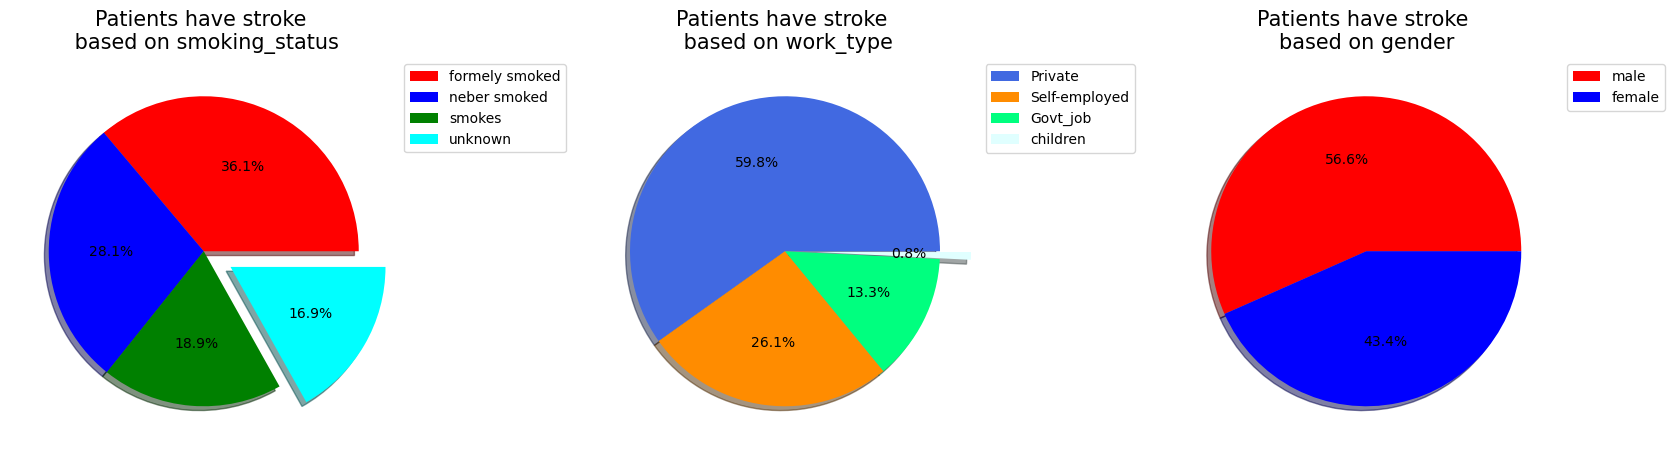

In [21]:
plt.figure(figsize=(20,18))
plt.subplot(131)
plt.subplots_adjust(wspace=0.5)
labels = [ "formely smoked" , "neber smoked","smokes","unknown"]
plt.pie(x=data1.smoking_status[data1.stroke == 1].value_counts(),explode = (0, 0, 0, 0.2),autopct='%1.1f%%',
        shadow=True, colors=['red','blue','green','cyan']);
plt.legend(labels,bbox_to_anchor=(1,1),loc="upper left");
plt.title("Patients have stroke \n based on smoking_status",{'fontsize':15});

plt.subplot(132)
plt.subplots_adjust(wspace=0.5)
labels = [ "Private" , "Self-employed","Govt_job","children"]
plt.pie(x=data1.work_type[data1.stroke == 1].value_counts(),explode = (0, 0, 0, 0.2),autopct='%1.1f%%',
        shadow=True, colors=['royalblue','darkorange','springgreen','lightcyan','red']);
plt.legend(labels,bbox_to_anchor=(1,1),loc="upper left");
plt.title("Patients have stroke \n based on work_type",{'fontsize':15});


plt.subplot(133)
plt.subplots_adjust(wspace=0.5)
labels = ['male','female','other']
plt.pie(x=data1.gender[data1.stroke == 1].value_counts(),autopct='%1.1f%%',
        shadow=True, colors=['red','blue','green','cyan']);
plt.legend(labels,bbox_to_anchor=(1,1),loc="upper left");
plt.title("Patients have stroke \nbased on gender",{'fontsize':15});

In [22]:
#As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status.

#People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have
#a very less stroke rate

#Seems like the dataset is imbalanced. Anyway, as we can there is not much difference between stroke rate concerning gender

In [23]:
# donut

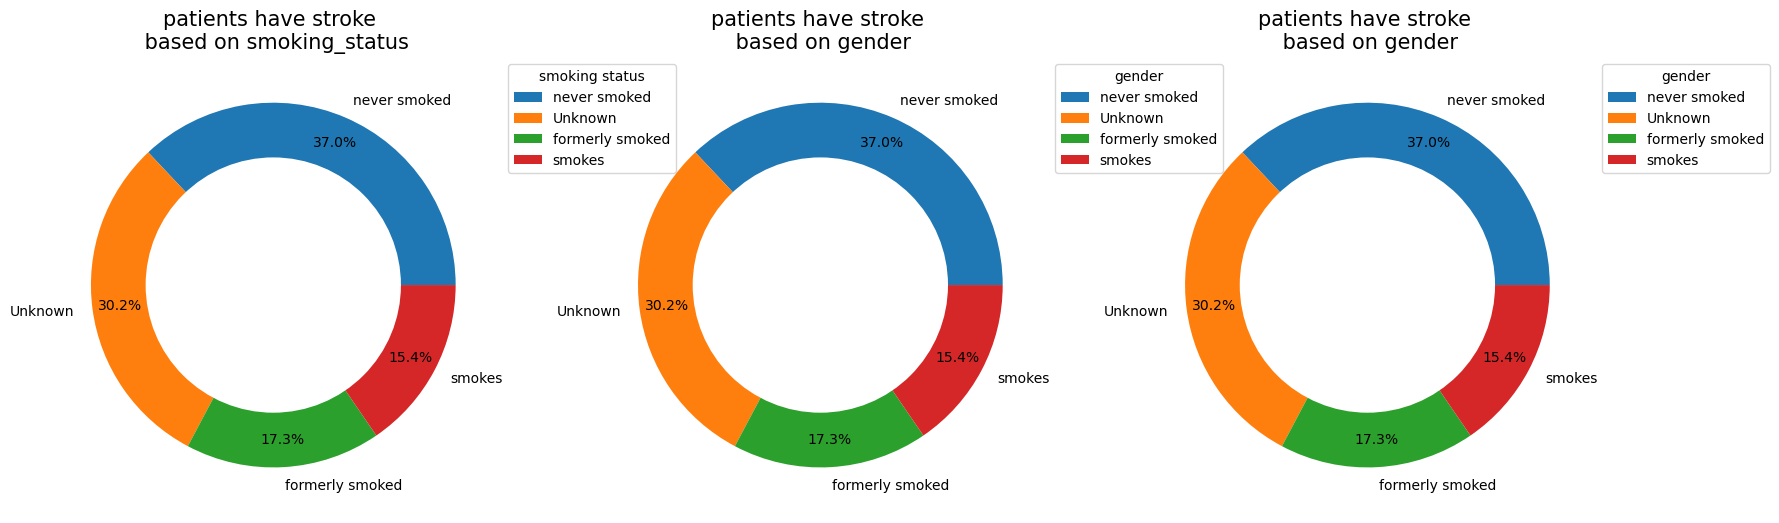

In [24]:
fig=plt.figure(figsize=(20,18))
plt.subplot(131)
donutdf=pd.DataFrame(data['smoking_status'].value_counts())
x=donutdf.index
numbers=donutdf.values.ravel()
explode=(0.05,0.05,0.05)
fig=plt.pie(numbers,labels=x,autopct='%1.1f%%',pctdistance=0.85)
Centre_Circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(Centre_Circle)
plt.title('patients have stroke \n based on smoking_status',{'fontsize':15})
plt.legend(title='smoking status',bbox_to_anchor=(1,1))

plt.subplot(132)
donutdf=pd.DataFrame(data['smoking_status'].value_counts())
x=donutdf.index
numbers=donutdf.values.ravel()
explode=(0.05,0.05,0.05)
fig=plt.pie(numbers,labels=x,autopct='%1.1f%%',pctdistance=0.85)
Centre_Circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(Centre_Circle)
plt.title('patients have stroke \n based on gender',{'fontsize':15})
plt.legend(title='gender',bbox_to_anchor=(1,1))
plt.subplot(133)
donutdf=pd.DataFrame(data['smoking_status'].value_counts())
x=donutdf.index
numbers=donutdf.values.ravel()
explode=(0.05,0.05,0.05)
fig=plt.pie(numbers,labels=x,autopct='%1.1f%%',pctdistance=0.85)
Centre_Circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(Centre_Circle)
plt.title('patients have stroke \n based on gender',{'fontsize':15})
plt.legend(title='gender',bbox_to_anchor=(1,1))
plt.show()


In [25]:
#BOX PLOT

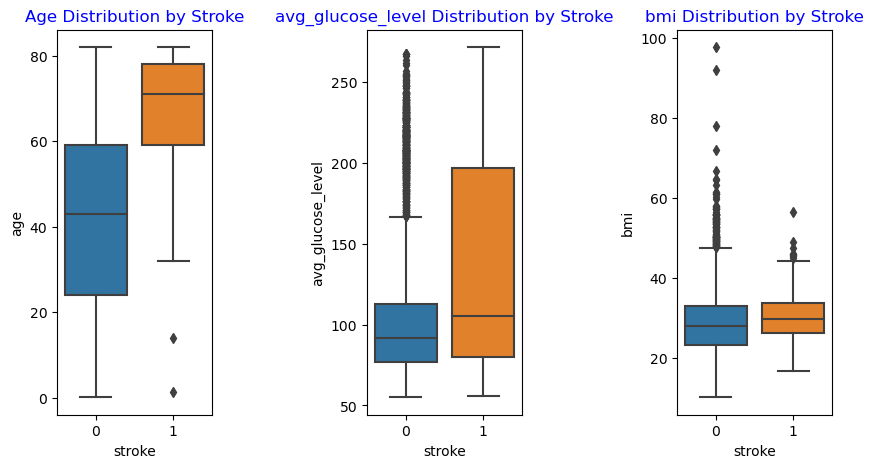

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.subplots_adjust(wspace=1)
sns.boxplot(x="stroke", y="age",data=data1)
plt.title("Age Distribution by Stroke",color='blue')
plt.subplot(132)
plt.subplots_adjust(wspace=1)
sns.boxplot(data=data1, x="stroke", y='avg_glucose_level')
plt.title("avg_glucose_level Distribution by Stroke",color='blue')
plt.subplot(133)
plt.subplots_adjust(wspace=1)
sns.boxplot(data=data1, x="stroke", y='bmi')
plt.title("bmi Distribution by Stroke",color='blue')
plt.show()

In [27]:
#People aged more than 60 years tend to have a stroke. Some outliers can be seen as people below age 20 are having a stroke
#it might be possible that it’s valid data as stroke also depends on our eating and living habits. Another observation is people
#not having strokes also consist of people age > 60 years

#From this above graph, we can see that people having stroke have an average glucose level of more than 100. There are some
#obvious outliers in patients who have no stroke but there are some chances of this being genuine records.

#There is as such no prominent observation of how does BMI affects the chances of having a stroke.

In [28]:
# HISTOGRAM

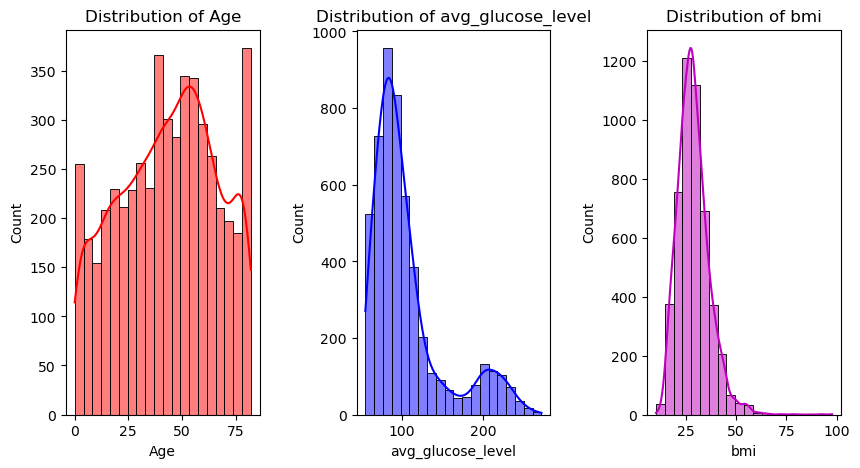

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.subplots_adjust(wspace=0.5)
sns.histplot(data=data1, x="age", bins=20,color='red', kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.subplot(132)
plt.subplots_adjust(wspace=0.5)
sns.histplot(data=data1, x="avg_glucose_level", bins=20,color='blue', kde=True)
plt.title("Distribution of avg_glucose_level")
plt.xlabel("avg_glucose_level")
plt.ylabel("Count")
plt.subplot(133)
plt.subplots_adjust(wspace=0.5)
sns.histplot(data=data1, x="bmi", bins=20,color='m', kde=True)
plt.title("Distribution of bmi")
plt.xlabel("bmi")
plt.ylabel("Count")
plt.show()

In [30]:
#scatter plot

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

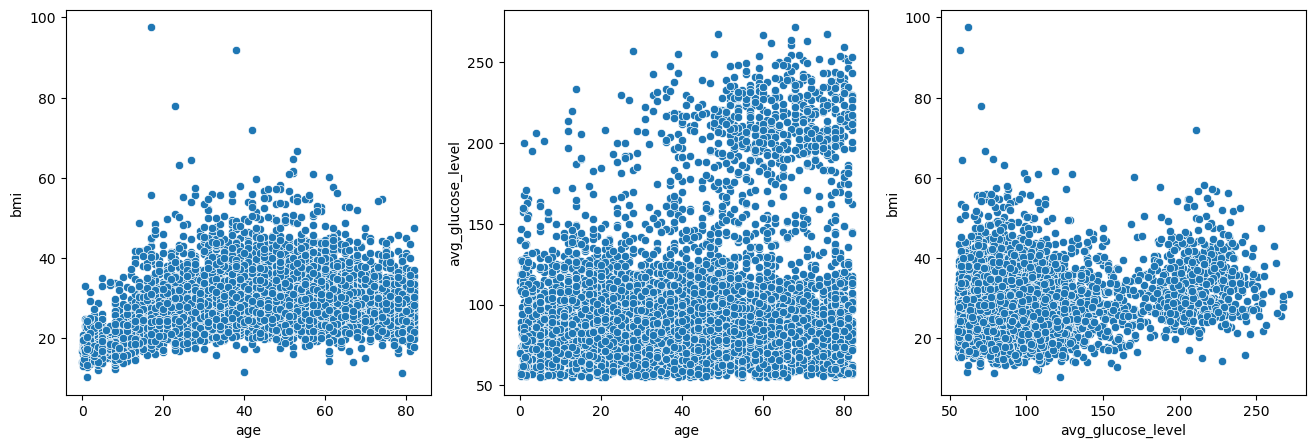

In [31]:
num_cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.scatterplot(data=data1, x='age',y='bmi')
plt.subplot(1, 3,2)
sns.scatterplot(data=data1, x='age',y='avg_glucose_level')
plt.subplot(1, 3,3)
sns.scatterplot(data=data1, x='avg_glucose_level',y='bmi')

In [32]:
#Accoding to data, high avg_glucose level is recorded in patient of age above 50.
#BMI is high in patients of age between 20-60.
#If glucose level is high or low then it is more chance that your glucose level is low according to this data.

In [33]:
# Heatmaps

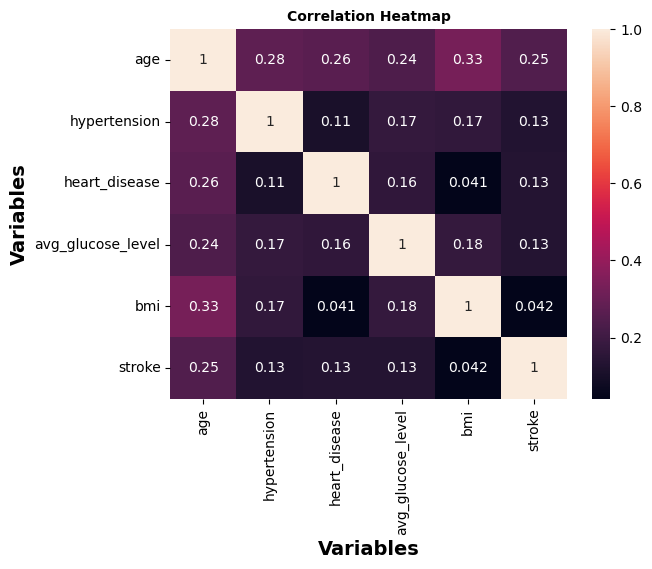

In [34]:
sns.heatmap(data1.corr(),annot=True)
plt.title("Correlation Heatmap", fontsize=10, fontweight='bold', color='black')
plt.xlabel("Variables", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Variables", fontsize=14, fontweight='bold', color='black')
plt.show()

# preprocessing

# MISSING VALUE

In [35]:
data1.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [36]:
for i in ['bmi']:
    data1[i]=data1[i].fillna(data1[i].median())

In [37]:
data1.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# ENCODING

In [38]:
data1.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in data1.columns:
  if data1[col].dtype=='object':
    data1[col]=label_encoder.fit_transform(data1[col].astype(str))


In [40]:
data1.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [41]:
data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


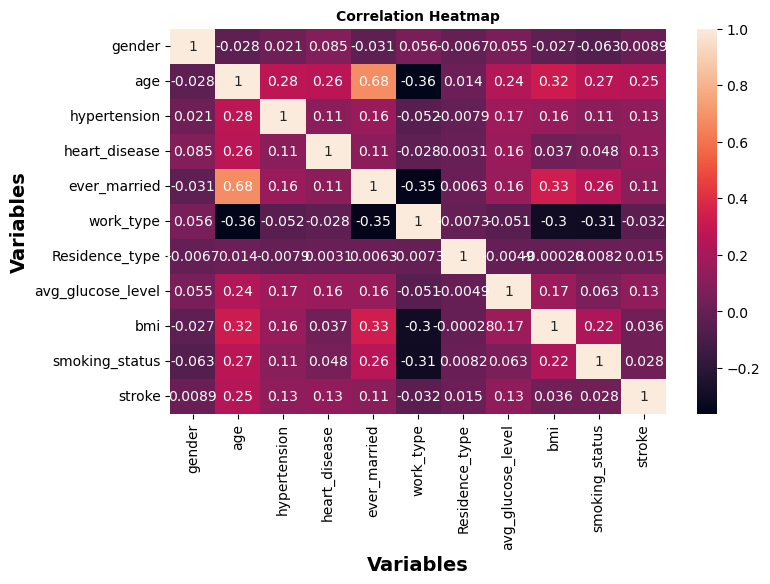

In [42]:
#Correlation
plt.figure(figsize=(8,5))
sns.heatmap(data1.corr(),annot=True)
plt.title("Correlation Heatmap", fontsize=10, fontweight='bold', color='black')
plt.xlabel("Variables", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Variables", fontsize=14, fontweight='bold', color='black')
plt.show()

In [43]:
#Variables that are showing some effective correlation are:
#age, hypertension, heart_disease, ever_married, avg_glucose_level.
#Just to be on the safe side let’s check our features using SelectKBest and F_Classif.

In [44]:
#In the above result, we can see that age is a highly correlated variable and then it gets decreasing

In [45]:
# TRAIN TEST SPLIT

In [46]:
x=data1.drop(['stroke'],axis=1)
y=data1['stroke']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

# scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(data1)

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  1.00508597,
        -0.35178071,  4.41838074],
       [-0.840344  ,  0.78607007, -0.32860186, ..., -0.09898092,
         0.58155233,  4.41838074],
       [ 1.18807255,  1.62639008, -0.32860186, ...,  0.47253605,
         0.58155233,  4.41838074],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ...,  0.22574463,
         0.58155233, -0.22632726],
       [ 1.18807255,  0.34379639, -0.32860186, ..., -0.42370648,
        -0.35178071, -0.22632726],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.34577235,
        -1.28511375, -0.22632726]])

In [49]:
data1=pd.DataFrame(data,columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'])

# Models

# stratified k_fold cross validation

# LOGISTICREGRESSION

In [50]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [51]:
from sklearn.model_selection import StratifiedKFold

In [52]:
skfold_validator=StratifiedKFold(n_splits=10)

In [53]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [  25   26   27 ... 5107 5108 5109]
Testing index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385
 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403
 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421
 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439
 440 441 442 443 444 445 446 447 448 449 450 451 452 453 

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
skcv_score0=cross_val_score(logit_model,x,y,cv=skfold_validator)
skcv_score0

array([0.95107632, 0.95303327, 0.95107632, 0.95107632, 0.94716243,
       0.95107632, 0.94911937, 0.95107632, 0.95303327, 0.95303327])

In [56]:
skcv_score0=np.mean(skcv_score0)
skcv_score0

0.9510763209393346

# RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [58]:
skcv_score1=cross_val_score(rf_clf,x,y,cv=skfold_validator)
skcv_score1

array([0.94911937, 0.95107632, 0.94911937, 0.94911937, 0.94716243,
       0.95107632, 0.94911937, 0.95107632, 0.95107632, 0.95107632])

In [59]:
skcv_score1=np.mean(skcv_score1)
skcv_score1

0.9499021526418785

# DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [61]:
skcv_score2=cross_val_score(dt_clf,x,y,cv=skfold_validator)
skcv_score2=np.mean(skcv_score2)
skcv_score2

0.912720156555773

# SVM

In [62]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred=svmclf.predict(x_test)

In [63]:
skcv_score3=cross_val_score(svmclf,x,y,cv=skfold_validator)
skcv_score3=np.mean(skcv_score3)
skcv_score3

0.9512720156555773

# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pread=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pread)
    metric_k.append(acc)

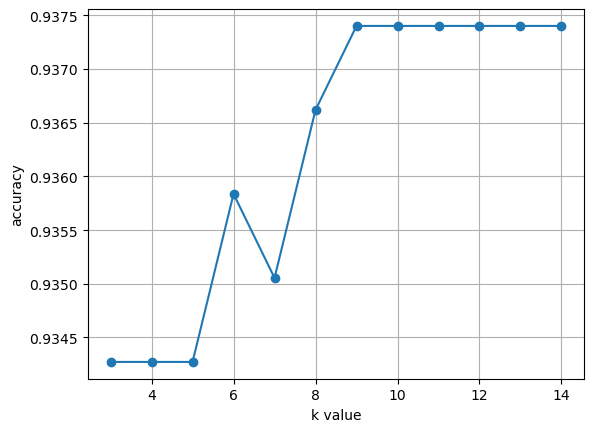

In [65]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [66]:
classifier=KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pread=classifier.predict(x_test)

In [67]:
skcv_score4=cross_val_score(classifier,x,y,cv=skfold_validator)
skcv_score4=np.mean(skcv_score4)
skcv_score4

0.9504892367906066

# Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)
y_pred=NaiveBayes.predict(x_test)

In [69]:
skcv_score5=cross_val_score(NaiveBayes,x,y,cv=skfold_validator)
skcv_score5=np.mean(skcv_score5)
skcv_score5

0.8673189823874754

# comparing accuracy of diffrent models

In [70]:
alg=['KNeighborsClassifier','svm','DecisionTreeClassifier',' RandomForestClassifier','LogisticRegression','GaussianNB']
skcv=[skcv_score0,skcv_score1,skcv_score2,skcv_score3,skcv_score4,skcv_score5]
skcv_score=pd.DataFrame({'algorithms':alg,'skcv_score':skcv})
skcv_score['skcv_score']=skcv_score['skcv_score']*100
skcv_score

,algorithms,skcv_score
0,KNeighborsClassifier,95.107632
1,svm,94.990215
2,DecisionTreeClassifier,91.272016
3,RandomForestClassifier,95.127202
4,LogisticRegression,95.048924
5,GaussianNB,86.731898


In [71]:
skcv_score.sort_values(by='skcv_score',ascending=False)

,algorithms,skcv_score
3,RandomForestClassifier,95.127202
0,KNeighborsClassifier,95.107632
4,LogisticRegression,95.048924
1,svm,94.990215
2,DecisionTreeClassifier,91.272016
5,GaussianNB,86.731898


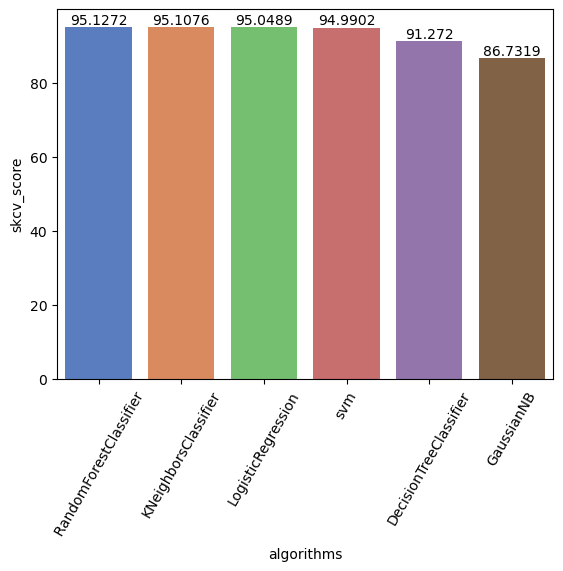

In [72]:
ax=sns.barplot(x='algorithms',y='skcv_score',palette='muted',data=skcv_score.sort_values(by='skcv_score',ascending=False),errwidth=0)
for i in ax.containers:
    ax.bar_label(i)
    plt.xticks(rotation=60)

# Observattions
 # Random Forest algorithm gave highest accuracy score for this data set